In [561]:
import numpy as np
import json
import urllib.request
import codecs
from konlpy.tag import Okt
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN
from nltk import word_tokenize

# 형태소 분석

In [602]:
def test_sop (infile, outfile):
    readFp = open(infile, "r", encoding="utf-8")
    wakati_file = outfile
    writeFp = open(wakati_file, "w", encoding="utf-8")

    # 형태소 분석
    twitter = Okt()
    i = 0

    while True:
        line = readFp.readline()
        if not line: break
            
        malist = twitter.pos(line, norm=True, stem=True)

        for word in malist:
            if word[1] in ["Noun"]:
                 writeFp.write(word[0] + " ")
    writeFp.close()

# Word 전처리

In [603]:
data_token = []

finance = codecs.open("finance.m", "r" , encoding="utf-8").read()
tokens_f = word_tokenize(finance)
for i, j in zip(tokens_f, range(30000)):
    data_token.append(i)
sports = codecs.open("sports.m", "r" , encoding="utf-8").read()
tokens_s = word_tokenize(sports)
for i, j in zip(tokens_s, range(30000)):
    data_token.append(i)
len(data_token)

60000

In [604]:
# data_token = np.array(data_token)

data_split = []
for i in range(600):
    data_split.append(data_token[i*100 : (i+1)*100])
len(data_split)

600

In [605]:
len_word = 1000

In [606]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=len_word)
tokenizer.fit_on_texts(data_split)

sequences = tokenizer.texts_to_sequences(data_split)
# print("sequences",  sequences  )

In [607]:
#input_train = tokenizer.texts_to_matrix(data_token, mode='binary')
from keras.preprocessing import sequence

input_train = sequence.pad_sequences(sequences, maxlen=len_word)

In [608]:
input_train
print(input_train.shape)

(600, 1000)


## labeling

In [609]:
y1 = [0] * 300
y2 = [1] * 300
y3 = y1 + y2
print(y3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [610]:
from keras.utils import np_utils

y_label = np.array(y3)
y_label = np_utils.to_categorical(y_label, 2, dtype = "float32")

print(y_label.shape)

(600, 2)


## Model

In [611]:
from keras.layers import Dense, LSTM, Embedding

max_features = 3000

model = Sequential()
model.add(Embedding(max_features, 200))
model.add(SimpleRNN(64))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

## Train

In [614]:
history = model.fit(input_train, y_label,
                   epochs = 10,
                   batch_size = 120,
                   shuffle=True,
                   validation_split = 0.2) 

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 3s 6ms/step - loss: 0.0426 - acc: 1.0000 - val_loss: 0.2844 - val_acc: 0.9167
Epoch 2/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0277 - acc: 1.0000 - val_loss: 0.2634 - val_acc: 0.9250
Epoch 3/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0197 - acc: 1.0000 - val_loss: 0.1864 - val_acc: 0.9500
Epoch 4/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0167 - acc: 1.0000 - val_loss: 0.6000 - val_acc: 0.7750
Epoch 5/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0142 - acc: 1.0000 - val_loss: 0.2337 - val_acc: 0.9417
Epoch 6/10
480/480 [==============================] - 4s 8ms/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.3458 - val_acc: 0.9083
Epoch 7/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0075 - acc: 1.0000 - val_loss: 0.1769 - val_acc: 0.9667
Epoch 8/10
480/480 [==========

## Best param

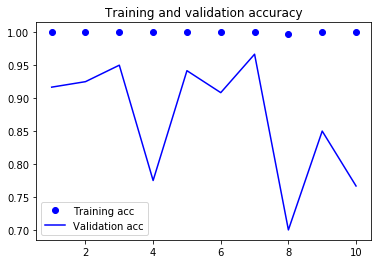

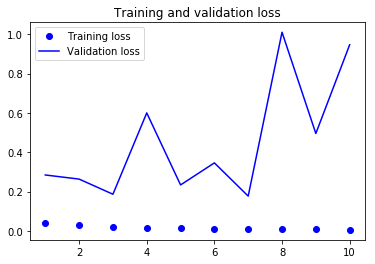

In [615]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Test

In [619]:
twitter = Okt()

test_data ="""정부가 한달 전부터 민간택지 아파트로도 분양가 상한제를 확대하겠다는 뜻을 밝혔는데요 세부안이 오늘 오전 발표됩 최근 반등세를 나타내고 있는 주택 시장이 어떤 반응을 보일지 주목됩니다. """
malist = twitter.pos(test_data, norm=True, stem=True)
test_data_list = []
for word in malist:
    if word[1] in ["Noun"]:
        test_data_list.append(word[0])
print(test_data_list)

['정부', '달', '전', '민간', '택지', '아파트', '도', '분양', '상한', '제', '확대', '뜻', '세부', '안이', '오늘', '오전', '발표', '최근', '등세', '주택', '시장', '반응', '주목']


In [617]:
twitter = Okt()

test_data ="""오늘 경기는 유벤투스의 승리로 승점 1점 더 챙기게 되었습니다 경기중 심판의 오판이 있던 판결에 대해 관중들은 크게 아쉬움을 표했습니다."""
malist = twitter.pos(test_data, norm=True, stem=True)
test_data_list = []
for word in malist:
    if word[1] in ["Noun"]:
        test_data_list.append(word[0])
print(test_data_list)

['오늘', '경기', '유벤투스', '승리', '승점', '점', '더', '경기', '심판', '판이', '판결', '대해', '관중', '크게', '아쉬움', '표']


In [620]:
data_token_test = []
for i in range(len(test_data_list)):
#     tokens = word_tokenize(test_data_list[i])
#     data_token_test.append(tokens)
    data_token_test.append(test_data_list[i])
data_token_test = np.array(data_token_test)

tokenizer.fit_on_texts(data_token_test)
sequences = tokenizer.texts_to_sequences(data_token_test)
test_data_sequence = sequence.pad_sequences(sequences, maxlen=len_word)

a = model.predict(test_data_sequence)

print(a)
predict = np.argmax(a)
if predict == 0:
    print('이 카테고리는 경제입니다')
elif predict == 1: 
    print('이 카테고리는 스포츠입니다')

[[0.923643   0.07635704]
 [0.9272172  0.07278279]
 [0.90650886 0.09349115]
 [0.93165284 0.0683471 ]
 [0.94490224 0.05509774]
 [0.90182805 0.09817197]
 [0.9356381  0.06436178]
 [0.9232182  0.07678184]
 [0.92788494 0.07211505]
 [0.94413966 0.0558604 ]
 [0.90898836 0.09101171]
 [0.9227417  0.0772583 ]
 [0.9227417  0.0772583 ]
 [0.9227417  0.0772583 ]
 [0.92530733 0.07469266]
 [0.9278145  0.07218552]
 [0.9061552  0.09384477]
 [0.94822574 0.05177428]
 [0.9227417  0.0772583 ]
 [0.94092435 0.05907558]
 [0.944313   0.05568697]
 [0.9227417  0.0772583 ]
 [0.9319055  0.06809452]]


In [ ]:
# tokenizer = Tokenizer(num_words=len_word)
# tokenizer.fit_on_texts(data_split)

# sequences = tokenizer.texts_to_sequences(data_split)